In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from numpy import sqrt
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from statsmodels.tsa.seasonal import seasonal_decompose 

In [3]:
dataframe = pd.read_csv(r"sales_train.csv", index_col='date', parse_dates=True)
dataframe.head() 

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-02-01,0,59,22154,999.00,1.0
2013-03-01,0,25,2552,899.00,1.0
2013-05-01,0,25,2552,899.00,-1.0
2013-06-01,0,25,2554,1709.05,1.0
2013-01-15,0,25,2555,1099.00,1.0


In [4]:
dataframe.columns.tolist()

['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']

In [5]:
df = dataframe.drop(['date_block_num', 'shop_id', 'item_id', 'item_cnt_day'] , axis=1)
df

,item_price
date,
2013-02-01,999.00
2013-03-01,899.00
2013-05-01,899.00
2013-06-01,1709.05
2013-01-15,1099.00
...,...
2015-10-10,299.00
2015-09-10,299.00
2015-10-14,349.00


<AxesSubplot:>

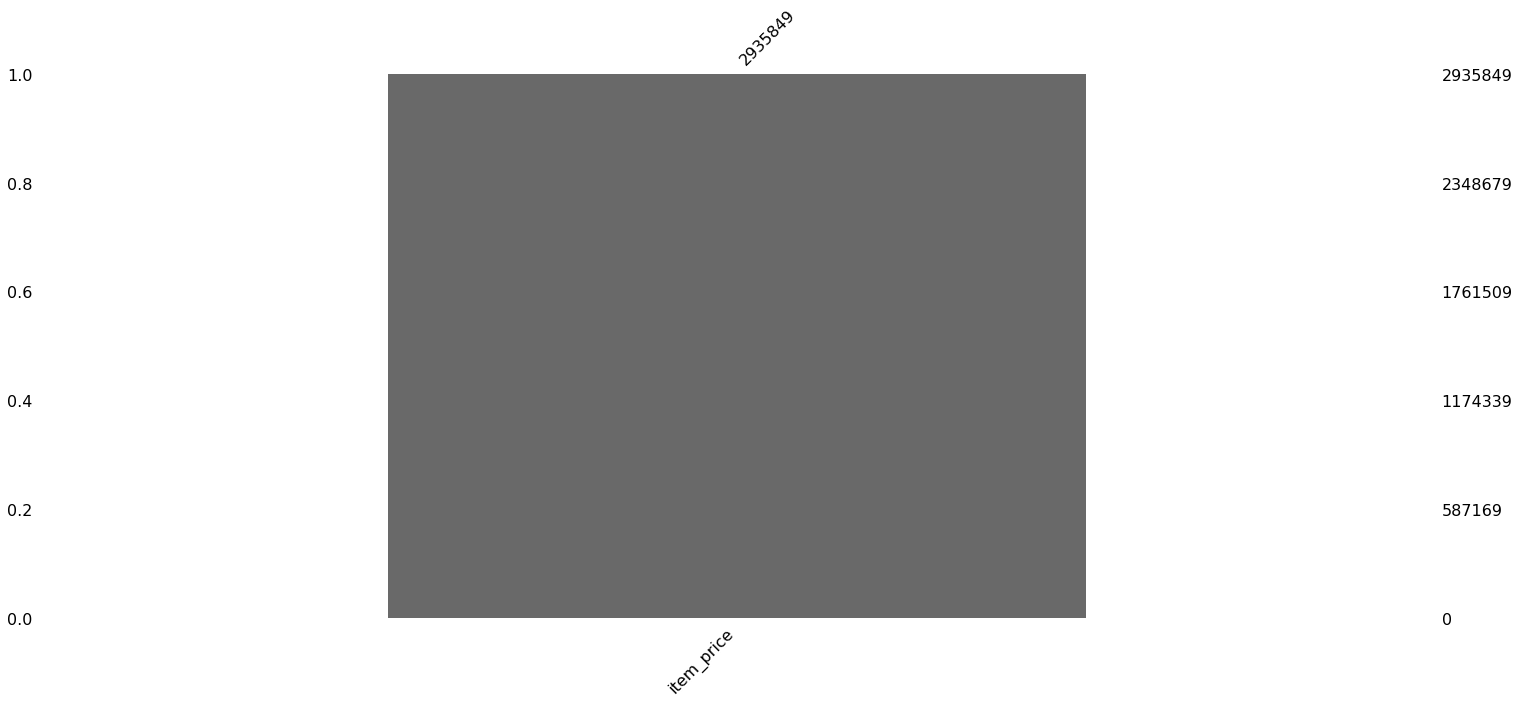

In [6]:
msno.bar(df)

<AxesSubplot:xlabel='date'>

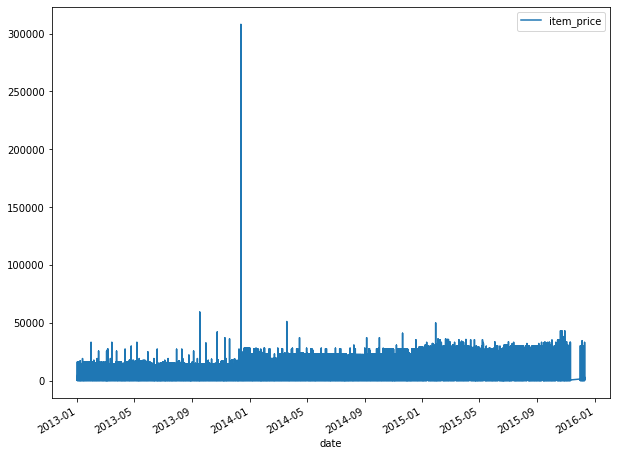

In [7]:
df.plot(figsize=(10,8))

In [8]:
df.shape

(2935849, 1)

In [9]:
X = df.values

In [10]:
train = df.iloc[:2500000]
test = df.iloc[2500000:] 

In [11]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()

In [12]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [13]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 
n_input = 20
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=2)

#data_gen = TimeseriesGenerator(data, targets, length=10, sampling_rate=2, batch_size=2)
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/TimeseriesGenerator

In [14]:
#define model
#model type Sequential
#stacked LSTM model with regularization methods

model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features), return_sequences=True))
model.add(Dropout(0.5))
#model.add(BatchNormalization())
model.add(LSTM(100,activation='relu', return_sequences=True))
model.add(Dropout(0.5))
#model.add(BatchNormalization())
model.add(LSTM(100,activation='relu', return_sequences=True))
#model.add(BatchNormalization())
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 100)           40800     
_________________________________________________________________
dropout (Dropout)            (None, 20, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 100)           80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 100)           80400     
_________________________________________________________________
dense (Dense)                (None, 20, 1)             101       
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
__________________________________________________

In [15]:
model.compile(optimizer='Adam',loss='mse')

In [16]:
# fit model
model.fit(TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=32),epochs=11,verbose=1)

Epoch 1/11
78125/78125 [==============================] - 1847s 24ms/step - loss: 3.1258e-05
Epoch 2/11
78125/78125 [==============================] - 1820s 23ms/step - loss: 3.1250e-05
Epoch 3/11
78125/78125 [==============================] - 1946s 25ms/step - loss: 3.1234e-05
Epoch 4/11
78125/78125 [==============================] - 2046s 26ms/step - loss: 3.1280e-05
Epoch 5/11
78125/78125 [==============================] - 2080s 27ms/step - loss: 3.1269e-05
Epoch 6/11
78125/78125 [==============================] - 1860s 24ms/step - loss: 3.1272e-05
Epoch 7/11
78125/78125 [==============================] - 1877s 24ms/step - loss: 3.1258e-05
Epoch 8/11
78125/78125 [==============================] - 1857s 24ms/step - loss: 3.1268e-05
Epoch 9/11
78125/78125 [==============================] - 1820s 23ms/step - loss: 3.1260e-05
Epoch 10/11
78125/78125 [==============================] - 1837s 24ms/step - loss: 3.1246e-05
Epoch 11/11
78125/78125 [==============================] - 1833s 23ms